## Importing Libraries

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sb
import pandas as pd

## Reading Some Graphs

In [2]:
g = nx.read_edgelist('./Email-EuAll.txt', comments="#", delimiter="\t", create_using=nx.DiGraph())

## Node Degree

The node degree of an node follows two properties:
* Undirected Graph: Is the amount of edges that connect a node $k_{i}$ to its neighbors.
* Directed Graph: Is the amount of incoming and outgoing edges of a Node. Thus the degree of a node is $k_i=k_{i}^{out}+k_{i}^{in}$.

To retrieve the degree of each node is quite simple, the only thing necessary is to call the built-in function of `networkx.degree()` passing as parameter the graph representation of just calling the built-in function of the graph as `g.degree()`. By doing so, a dictionary containing the degree of all nodes is returned:


In [3]:
nx.degree(g)

{'0': 15,
 '1': 1144,
 '4': 219,
 '5': 317,
 '8': 53,
 '11': 155,
 '20': 412,
 '48': 436,
 '130': 297,
 '160': 424,
 '430': 102,
 '668': 515,
 '736': 182,
 '3612': 58,
 '4252': 79,
 '16687': 46,
 '44': 419,
 '50': 851,
 '56': 1419,
 '98': 7,
 '99': 415,
 '106': 536,
 '146': 978,
 '147': 2055,
 '149': 896,
 '158': 1791,
 '171': 850,
 '175': 1600,
 '184': 506,
 '206': 1007,
 '259': 485,
 '333': 1140,
 '336': 740,
 '392': 1808,
 '397': 491,
 '406': 2142,
 '422': 6436,
 '446': 365,
 '457': 528,
 '585': 139,
 '602': 1765,
 '620': 510,
 '640': 1625,
 '732': 6,
 '733': 217,
 '779': 1753,
 '841': 405,
 '1033': 913,
 '1118': 949,
 '1261': 3,
 '1262': 168,
 '1290': 9,
 '1370': 761,
 '1425': 430,
 '1458': 224,
 '1515': 792,
 '1518': 147,
 '1521': 24,
 '1546': 11,
 '1619': 387,
 '1623': 557,
 '1776': 274,
 '1803': 268,
 '1966': 3,
 '1969': 54,
 '2014': 17,
 '2037': 28,
 '2058': 2,
 '2244': 480,
 '2356': 6,
 '2558': 4,
 '2874': 80,
 '2924': 3,
 '3449': 28,
 '4200': 5,
 '4681': 2,
 '5357': 61,
 '559

# Building a test graph

In [4]:
gtest  = nx.Graph()

In [5]:
gtest.add_edge(4, 2)
gtest.add_edge(4, 3)
gtest.add_edge(3, 2)
gtest.add_edge(2, 1)

To show the degree for each node of the graph, it's only necessary to use the function graph.degree().

In [6]:
df = pd.DataFrame(pd.Series(gtest.degree()), columns=["Degree"])
df

,Degree
1,1
2,3
3,2
4,2


(array([ 0.25,  0.5 ,  0.25]),
 array([1, 2, 3, 4]),
 <a list of 3 Patch objects>)

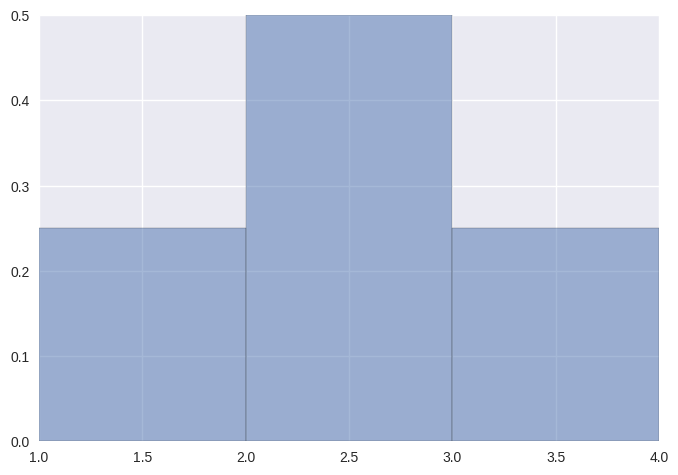

In [8]:
plt.hist(df.Degree.values, df.Degree.index.values, normed=True, alpha=0.5, bottom=0)

In [9]:
df.index.values

array([1, 2, 3, 4])

# Clustering Coefficients

In [10]:
print("Clustering coefficiente for each Node:", [nx.average_clustering(gtest, nodes=[x]) for x in range(1, 5, 1)])

Clustering coefficiente for each Node: [0.0, 0.3333333333333333, 1.0, 1.0]


In [11]:
print("Clustering coefficient for each Node:", nx.clustering(gtest))

Clustering coefficient for each Node: {4: 1.0, 2: 0.3333333333333333, 3: 1.0, 1: 0.0}


## Number of Connected Components
To return the number of connected components the function `networkx.number_of_connected_components` is used


In [12]:
nx.number_connected_components(gtest)

1

Adding a few more edges to verify the number of connected components increases.

In [13]:
gtest.edges()

[(4, 2), (4, 3), (2, 3), (2, 1)]

In [14]:
gtest.add_edge(5, 6)

In [15]:
nx.number_connected_components(gtest)

2

In [16]:
graphs = list(nx.connected_component_subgraphs(gtest))

In [17]:
print(graphs[0].nodes())
print(graphs[1].nodes())
print(len(graphs[0].nodes()))
print(len(graphs[1].nodes()))

[1, 2, 3, 4]
[5, 6]
4
2


## Betweenness Centrality

In [18]:
nx.edge_betweenness_centrality(gtest)

{(2, 1): 0.2,
 (2, 3): 0.13333333333333333,
 (4, 2): 0.13333333333333333,
 (4, 3): 0.06666666666666667,
 (5, 6): 0.06666666666666667}

In [19]:
nx.betweenness_centrality(gtest)

{1: 0.0, 2: 0.2, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0}

In [20]:
gtest2 = nx.Graph()

In [21]:
gtest2.add_edge(1, 2)
gtest2.add_edge(2, 3)
gtest2.add_edge(3, 4)
gtest2.add_edge(4, 5)

In [22]:
nx.edge_betweenness_centrality(gtest2)

{(1, 2): 0.4,
 (2, 3): 0.6000000000000001,
 (3, 4): 0.6000000000000001,
 (4, 5): 0.4}

In [23]:
nx.betweenness_centrality(gtest2)

{1: 0.0, 2: 0.5, 3: 0.6666666666666666, 4: 0.5, 5: 0.0}

## Closennes Distribution

In [24]:
nx.closeness_centrality(gtest)

{1: 0.36,
 2: 0.6,
 3: 0.44999999999999996,
 4: 0.44999999999999996,
 5: 0.2,
 6: 0.2}

In [26]:
nx.closeness_centrality(gtest2)

{1: 0.4,
 2: 0.5714285714285714,
 3: 0.6666666666666666,
 4: 0.5714285714285714,
 5: 0.4}

In [35]:
nx.eccentricity(gtest2)

{1: 4, 2: 3, 3: 2, 4: 3, 5: 4}